In [3]:
#pip install scipy


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 

In [5]:
#Primero queremos leer la tabla de datos
datos = pd.read_csv('Galaxias_color_2.csv')


In [6]:
datos['g-r']=datos['petroMag_g']- datos['petroMag_r']
datos

,specObjID,spiral,elliptical,petroMag_u,petroMag_r,petroMag_g,z,g-r
0,326558284548958208,1,0,19.10832,17.06106,17.73906,0.109850,0.67800
1,326569004787329024,0,1,20.86176,17.51276,19.08985,0.248169,1.57709
2,327682805351868416,1,0,19.61019,17.17898,18.05770,0.118198,0.87872
3,327700122660005888,1,0,18.37072,15.98199,16.99851,0.047356,1.01652
4,327705620218144768,1,0,19.24683,16.56079,17.41775,0.070256,0.85696
...,...,...,...,...,...,...,...,...
252410,2446690238848854016,1,0,19.59210,17.53860,18.47113,0.173262,0.93253
252411,2446690513726760960,1,0,20.18686,16.94943,17.95427,0.088267,1.00484
252412,2446718826151176192,1,0,18.86731,17.60067,18.10199,0.041243,0.50132
252413,3328214351491393536,0,1,19.12848,16.94564,17.70156,0.067408,0.75592


In [7]:
datos['u-g']=datos['petroMag_u']- datos['petroMag_g']
datos

,specObjID,spiral,elliptical,petroMag_u,petroMag_r,petroMag_g,z,g-r,u-g
0,326558284548958208,1,0,19.10832,17.06106,17.73906,0.109850,0.67800,1.36926
1,326569004787329024,0,1,20.86176,17.51276,19.08985,0.248169,1.57709,1.77191
2,327682805351868416,1,0,19.61019,17.17898,18.05770,0.118198,0.87872,1.55249
3,327700122660005888,1,0,18.37072,15.98199,16.99851,0.047356,1.01652,1.37221
4,327705620218144768,1,0,19.24683,16.56079,17.41775,0.070256,0.85696,1.82908
...,...,...,...,...,...,...,...,...,...
252410,2446690238848854016,1,0,19.59210,17.53860,18.47113,0.173262,0.93253,1.12097
252411,2446690513726760960,1,0,20.18686,16.94943,17.95427,0.088267,1.00484,2.23259
252412,2446718826151176192,1,0,18.86731,17.60067,18.10199,0.041243,0.50132,0.76532
252413,3328214351491393536,0,1,19.12848,16.94564,17.70156,0.067408,0.75592,1.42692


In [8]:
indx=(datos['petroMag_g']>0) & (datos['petroMag_r']>0) & (datos['petroMag_u']>0)

In [9]:
datos = datos[indx].copy()  # Crea una copia explícita del DataFrame filtrado


In [10]:
datos.loc[:, 'clase'] = 'spiral'  # Asigna 'spiral' a toda la columna 'clase'
datos.loc[datos['elliptical'] == 1, 'clase'] = 'elliptical'  # Cambia a 'elliptical' donde corresponda


In [11]:
datos_elip = datos[datos['elliptical']==1]

datos_spiral = datos[datos['spiral']==1]

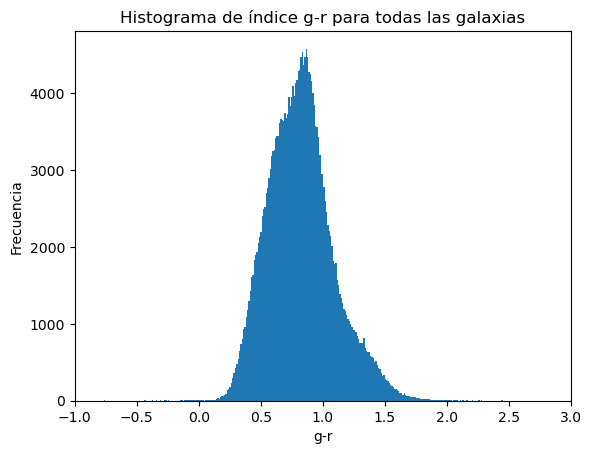

In [12]:
plt.hist(datos['g-r'], bins='auto')
plt.xlim(-1, 3)
plt.xlabel('g-r')
plt.ylabel('Frecuencia')
plt.title('Histograma de índice g-r para todas las galaxias')
plt.show()

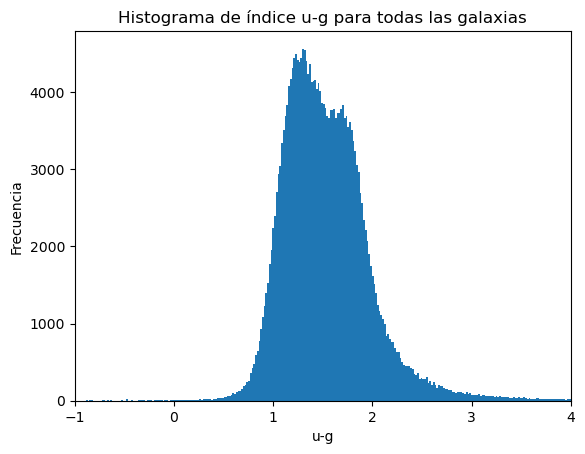

In [13]:
plt.hist(datos['u-g'], bins='auto')
plt.xlim(-1, 4)
plt.xlabel('u-g')
plt.ylabel('Frecuencia')
plt.title('Histograma de índice u-g para todas las galaxias')
plt.show()

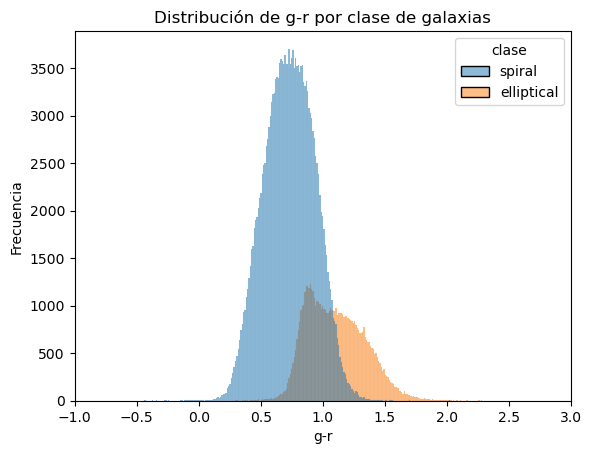

In [14]:
sns.histplot(datos, x='g-r', hue='clase')
plt.xlim(-1, 3)
plt.xlabel('g-r')
plt.ylabel('Frecuencia')
plt.title('Distribución de g-r por clase de galaxias')
plt.show()

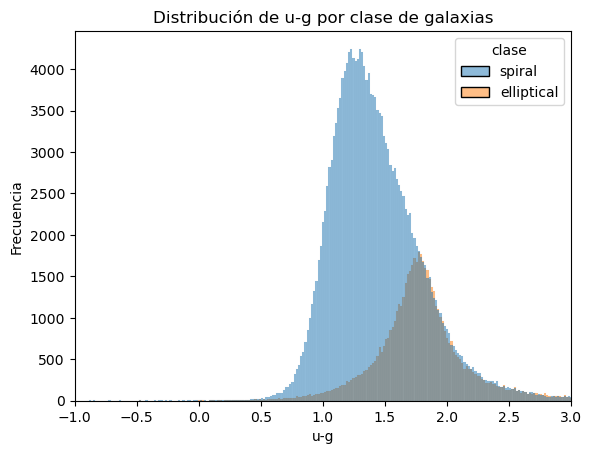

In [15]:
sns.histplot(datos, x='u-g', hue='clase')
plt.xlim(-1, 3)
plt.xlabel('u-g')
plt.ylabel('Frecuencia')
plt.title('Distribución de u-g por clase de galaxias')
plt.show()

In [16]:
#Definimos una funcion para calcular la cdf empirica
def empirical_cdf(data):
    """Calcula la función de distribución acumulada (CDF) empírica de una muestra de datos."""
    sorted_data = np.sort(data)  # Ordena los datos de menor a mayor
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # Crea la CDF
    return sorted_data, cdf  # Devuelve los datos ordenados y su CDF correspondiente


In [17]:
#Calcular las CDFs de las dos muestras (galaxias elípticas y espirales), se realiza primero para g-r
sorted_elip, cdf_elip = empirical_cdf(datos_elip['g-r'])
sorted_spiral, cdf_spiral = empirical_cdf(datos_spiral['g-r'])


In [18]:
all_values = np.sort(np.concatenate([sorted_elip, sorted_spiral])) 
#Unir ambas muestras para comparar sus CDFs en puntos comunes

In [19]:
cdf_elip_interp = np.interp(all_values, sorted_elip, cdf_elip, left=0, right=1) #Interpola los valores de las CDFs en los puntos comunes (es decir, los valores combinados de las muestras). La función toma los puntos all_values y devuelve los valores de las CDFs interpolados en esos puntos.
cdf_spiral_interp = np.interp(all_values, sorted_spiral, cdf_spiral, left=0, right=1)

Estadístico KS (D): 0.5698480840973787


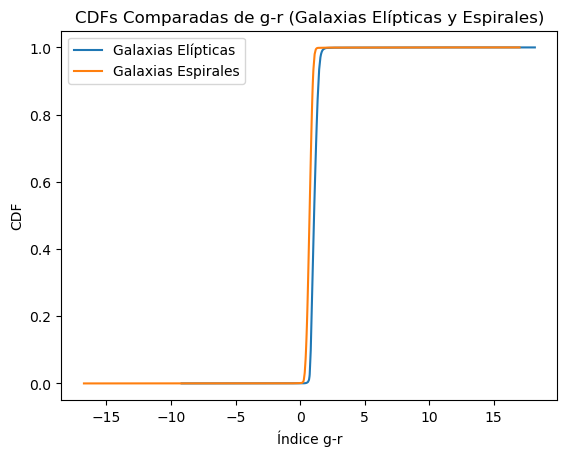

In [20]:
#Calcular la distancia máxima (estadístico KS) entre ambas distribuciones para g-r
D = np.max(np.abs(cdf_elip_interp - cdf_spiral_interp))
print(f"Estadístico KS (D): {D}")
plt.plot(sorted_elip, cdf_elip, label='Galaxias Elípticas')
plt.plot(sorted_spiral, cdf_spiral, label='Galaxias Espirales')
plt.title('CDFs Comparadas de g-r (Galaxias Elípticas y Espirales)')
plt.xlabel('Índice g-r')
plt.ylabel('CDF')
plt.legend()
plt.show()


In [21]:
from scipy.stats import ks_2samp

In [22]:

# Comparación de g-r entre elípticas y espirales
stat_gr, p_value_gr = ks_2samp(datos_elip['g-r'], datos_spiral['g-r'])
print(f"KS test g-r: estadístico = {stat_gr}, p-valor = {p_value_gr}")

KS test g-r: estadístico = 0.5698589340022256, p-valor = 0.0


In [23]:
alpha = 0.05  # Nivel de significancia


In [24]:
# Prueba de hipotesis con valor-p:
if p_value_gr < alpha:
    print("Rechazamos la hipótesis nula para g-r: Las distribuciones de galaxias elípticas y espirales son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula para g-r: No hay evidencia suficiente para afirmar que las distribuciones son diferentes.")


Rechazamos la hipótesis nula para g-r: Las distribuciones de galaxias elípticas y espirales son diferentes.


In [25]:
#Repetimos pero ahora para u-g.
# Calcular las CDFs para las dos muestras (galaxias elípticas y espirales)teniendo en cuenta la misma funcion cdf
sorted_elip_ug, cdf_elip_ug = empirical_cdf(datos_elip['u-g'])
sorted_spiral_ug, cdf_spiral_ug = empirical_cdf(datos_spiral['u-g'])


In [26]:
# Calcular el máximo valor absoluto de la diferencia (estadístico KS)
# Para esto, se necesita interpolar las CDFs en los puntos comunes de ambas muestras
all_values_ug = np.sort(np.concatenate([sorted_elip_ug, sorted_spiral_ug])) 



In [27]:
# Interpolar las CDFs en los puntos comunes
cdf_elip_interp_ug = np.interp(all_values_ug, sorted_elip_ug, cdf_elip_ug, left=0, right=1)
cdf_spiral_interp_ug = np.interp(all_values_ug, sorted_spiral_ug, cdf_spiral_ug, left=0, right=1)


In [28]:

# Calculamos la diferencia máxima entre ambas distribuciones
D_ug = np.max(np.abs(cdf_elip_interp_ug - cdf_spiral_interp_ug))

print(f"Estadístico KS (D) para u-g: {D_ug}")


Estadístico KS (D) para u-g: 0.4724231136425528


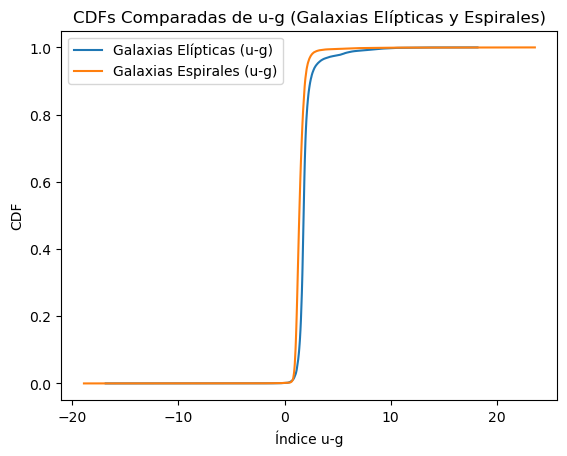

In [29]:
#Graficamos las CDFs para visualizar la diferencia entre las distribuciones elipticas y espirales
plt.plot(sorted_elip_ug, cdf_elip_ug, label='Galaxias Elípticas (u-g)')
plt.plot(sorted_spiral_ug, cdf_spiral_ug, label='Galaxias Espirales (u-g)')
plt.title('CDFs Comparadas de u-g (Galaxias Elípticas y Espirales)')
plt.xlabel('Índice u-g')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [30]:
#Realizamos la prueba Kolmogorov
# Comparación de u-g entre elípticas y espirales
stat_ug, p_value_ug = ks_2samp(datos_elip['u-g'], datos_spiral['u-g'])
print(f"KS test u-g: estadístico = {stat_ug}, p-valor = {p_value_ug}")

KS test u-g: estadístico = 0.4724311806308234, p-valor = 0.0


In [31]:
# Prueba de hipotesis con valor-p, utilizamos el mismo alpha de arriba 0.05
if p_value_gr < alpha:
    print("Rechazamos la hipótesis nula para g-r: Las distribuciones de galaxias elípticas y espirales son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula para g-r: No hay evidencia suficiente para afirmar que las distribuciones son diferentes.")


Rechazamos la hipótesis nula para g-r: Las distribuciones de galaxias elípticas y espirales son diferentes.
